## Model Optimization 
## PHASE II

* After running the same hyperparameter tuner model (all inputs and settings the same), our initial EDA identified that utilizing a dataset with replaced cholesterol values would lead to the highest possible accuracy. We then decided to utilize that dataset and try to optimize using keras sequential modeling. This allowed us to have more control over the architecture of each attempt and manually change the number of layers, neurons, activation functions and epochs.

In [1]:
# Import dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import keras_tuner as kt

In [2]:
# Connect to the database
con = sqlite3.connect('resources/heart.sqlite') 

# Run SQL on table         
sql_query = pd.read_sql('SELECT * FROM replaced', con)

# Display query results
sql_query.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Convert SQL to Pandas DataFrame
df_replaced = pd.DataFrame(sql_query, columns = ['Age',
                                        'Sex',
                                        'ChestPainType',
                                        'RestingBP',
                                        'Cholesterol',
                                        'FastingBS',
                                        'RestingECG',
                                        'MaxHR',
                                        'ExerciseAngina',
                                        'Oldpeak',
                                        'ST_Slope',
                                        'HeartDisease']
                 )

# Preview newly created DF
df_replaced.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Split our preprocessed data into our target and features arrays
y = df_replaced['HeartDisease']

# Drop the non-beneficial ID columns, 'HeartDisease'.
X = df_replaced.drop(columns='HeartDisease')

In [5]:
# Convert categorical data to numeric with `pd.get_dummies`
X= pd.get_dummies(X)

# Preview X DataFrame
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [6]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .2)

In [7]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
X_train.shape

(734, 20)

## Attempt #4
### 86.96% accuracy, .5190 loss
### Base Sequential Model
* This model was created by attempting to mirror the optimal model that came out of our hyperparamter tuning attempt #3
* Utilized 6 hidden layers with the tanh activation function and a sigmoid output layer. Resulting accuracy of nearly 87% was not as good as attempt #3.

In [9]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1
hidden_nodes_layer5 = 1
hidden_nodes_layer6 = 1

nn_model_4 = tf.keras.models.Sequential()

# First hidden layer
nn_model_4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Fifth hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# Sixth hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_4.summary()

/Users/andrewmack/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile the model
nn_model_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Train the model
model_4 = nn_model_4.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.4182 - loss: 0.6983
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.5306 - loss: 0.6910
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.5923 - loss: 0.6858
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.6822 - loss: 0.6768
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.7380 - loss: 0.6665
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.7678 - loss: 0.6554
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.7823 - loss: 0.6428
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.7970 - loss: 0.6355
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.8104 - loss: 0.6247
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.8240 - loss: 0.6114
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.8363 - loss: 0.5989
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 7ms/step - accuracy: 0.8696 - loss: 0.5191
Loss: 0.5190841555595398, Accuracy: 0.8695651888847351


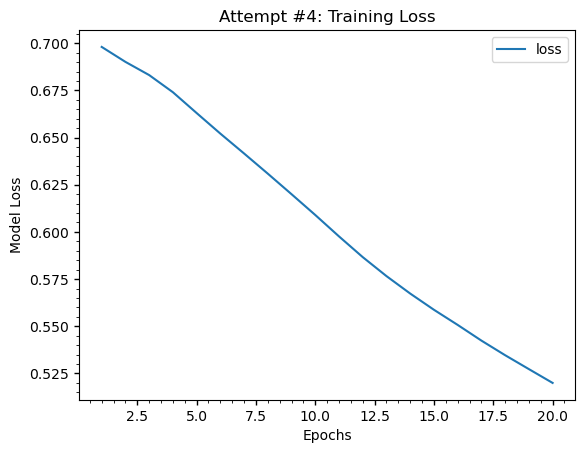

In [13]:
# Create a DataFrame containing training history
a4_df = pd.DataFrame(model_4.history)

# Increase the index by 1 to match the number of epochs
a4_df.index += 1

# Plot the loss
a4_df.plot(y="loss")
plt.title("Attempt #4: Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Model Loss")
plt.minorticks_on()
plt.tick_params(width=1)

# Display the plot and save image
plt.savefig("resources/images/a4_loss.png", format="png")
plt.show()

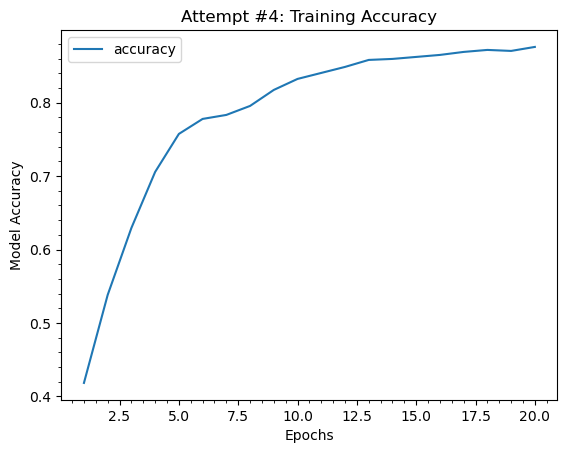

In [14]:
# Plot the accuracy
a4_df.plot(y="accuracy")
plt.title("Attempt #4: Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Model Accuracy")
plt.minorticks_on()

# Display the plot and save image
plt.savefig("resources/images/a4_accuracy.png", format="png")
plt.show()

## Attempt 5
### 88.04% accuracy, .3711 loss
### Changing number of layers
* Adding additional layers can give the model additional capacity to capture intricate relationships within the data. Each layer can learn different levels of abstraction, and potentially improving accuracy. Additional layers can be highly beneficial in solving complex problems. Conversely, too many layers may lead to overfitting of the data to the training set. Though we are showing just one attempt at changing the number of layers, we did find that adding additional layers beyond what we show in attempt #4 lead to a decrease in accuracy. Here we reduced the number of layers to see if that creates higher accuracy within the test set; interestingly, accuracy increased by roughly 1%.


In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1

nn_model_5 = tf.keras.models.Sequential()

# First hidden layer
nn_model_5.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn_model_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Output layer
nn_model_5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_5.summary()

/Users/andrewmack/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159 (636.00 B)

 Trainable params: 159 (636.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compile the model
nn_model_5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Train the model
model_5 = nn_model_5.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.6345 - loss: 0.6749
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.7197 - loss: 0.6045
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.7695 - loss: 0.5363
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.7628 - loss: 0.5404
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.8127 - loss: 0.4944
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.8295 - loss: 0.4675
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.8203 - loss: 0.4656
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.8138 - loss: 0.4599
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.8432 - loss: 0.4333
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.8329 - loss: 0.4339
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.8699 - loss: 0.4007
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 6ms/step - accuracy: 0.8804 - loss: 0.3711
Loss: 0.37114793062210083, Accuracy: 0.8804348111152649


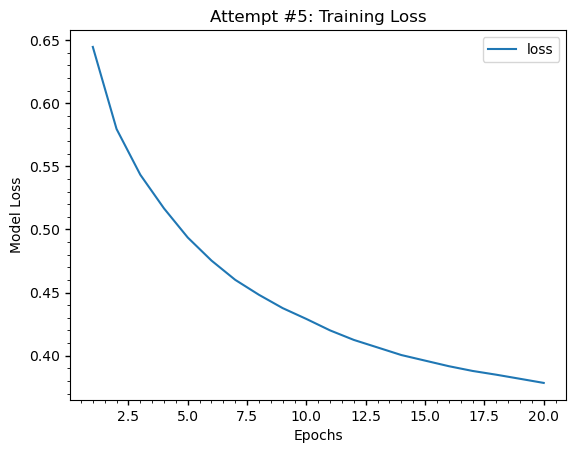

In [19]:
# Create a DataFrame containing training history
a5_df = pd.DataFrame(model_5.history)

# Increase the index by 1 to match the number of epochs
a5_df.index += 1

# Plot the loss
a5_df.plot(y="loss")
plt.title("Attempt #5: Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Model Loss")
plt.minorticks_on()
plt.tick_params(width=1)
plt.savefig("resources/images/a5_loss.png", format="png")
plt.show()

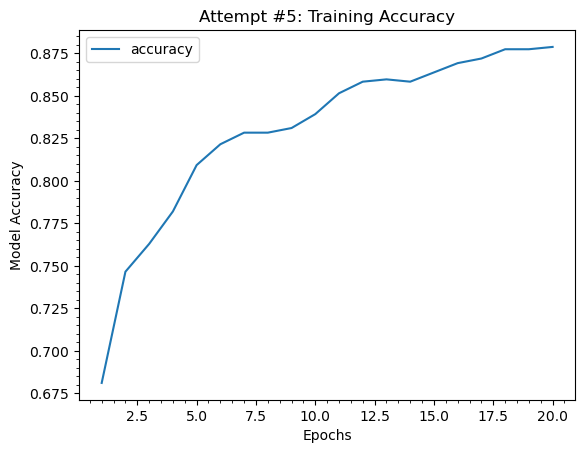

In [20]:
# Plot the accuracy
a5_df.plot(y="accuracy")
plt.title("Attempt #5: Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Model Accuracy")
plt.minorticks_on()
plt.savefig("resources/images/a5_accuracy.png", format="png")
plt.show()

## Attempt #6
### 84.78% accuracy, .4190 loss
### Changed number of epochs, 20 to 80
* In attempt #6 we used the same base architecture as attempt 4 to isolate epochs and control the other variables.
* Controlling those variables and keeping them the same would allows us to isolate the number of epochs and see if that would result in higher accuracy.
* An increased number of epochs gives the model more opportunities to learn from the data and adjust weights, but too many may overfit the model to the training dataset.
* As can be seen, increasing the number of epochs from 20 to 80 instead yielded a decrease in accuracy over attempt #4, and thus still unable to achieve the results of attempt #3 with the hyperparamter tuner. 

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1
hidden_nodes_layer5 = 1
hidden_nodes_layer6 = 1

nn_model_6 = tf.keras.models.Sequential()

# First hidden layer
nn_model_6.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Fifth hidden layer
nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# Sixth hidden layer
nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_6.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_6.summary()

/Users/andrewmack/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile the model
nn_model_6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Train the model
model_6 = nn_model_6.fit(X_train_scaled, y_train, epochs=80)

Epoch 1/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5462 - loss: 0.6869
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.6980 - loss: 0.6548
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.7225 - loss: 0.6385
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.7381 - loss: 0.6253
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.7885 - loss: 0.6006
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.8230 - loss: 0.5700
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.7975 - loss: 0.5639
Epoch 8/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.8223 - loss: 0.5437
Epoch 9/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.8755 - loss: 0.5118
Epoch 10/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.8690 - loss: 0.5075
Epoch 11/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.8762 - loss: 0.4874
Epoch 12/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_6.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 7ms/step - accuracy: 0.8478 - loss: 0.4190
Loss: 0.41904109716415405, Accuracy: 0.8478260636329651


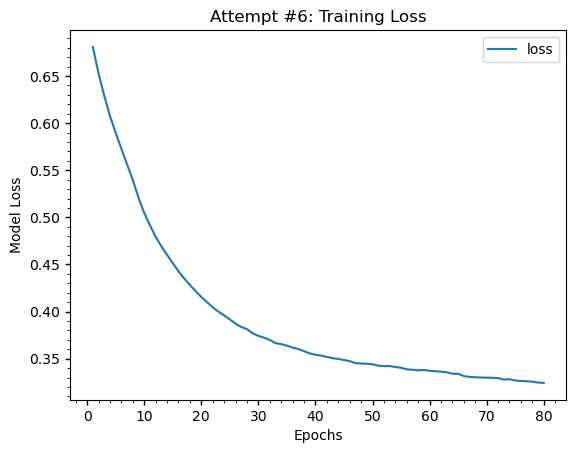

In [25]:
# Create a DataFrame containing training history
a6_df = pd.DataFrame(model_6.history)

# Increase the index by 1 to match the number of epochs
a6_df.index += 1

# Plot the loss
a6_df.plot(y="loss")
plt.title("Attempt #6: Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Model Loss")
plt.minorticks_on()
plt.tick_params(width=1)
plt.savefig("resources/images/a6_loss.png", format="png")
plt.show()

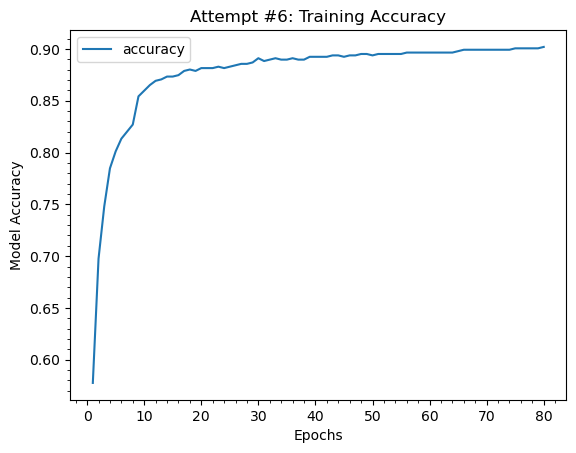

In [26]:
# Plot the accuracy
a6_df.plot(y="accuracy")
plt.title("Attempt #6: Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Model Accuracy")
plt.minorticks_on()
plt.savefig("resources/images/a6_accuracy.png", format="png")
plt.show()

## Attempt #7
### 86.41% accuracy, .5504 loss
### Changing activation functions:
* 1st hidden layer - tanh
* 2nd hidden layer - tanh
* 3rd hidden layer - relu
* 4th hidden layer - sigmoid
* 5th hidden layer - tanh
* 6th hidden layer - tanh
* output layer - sigmoid

* In attempt #7 we attempted to utilize different activation functions, such as relu and sigmoid in the hidden layers. This can affect how the model interprets and transforms the inputs. Different activation functions have different properties and can capture different types of non-linearities, that may better suit the problem at hand, potentially leading to increased accuracy. In this case, it did not yield a meaningful increase in accuracy over prior attempts, while loss of roughly .55 indicates increased prediction error in this model variation over prior attempted configurations.

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1
hidden_nodes_layer5 = 1
hidden_nodes_layer6 = 1

nn_model_7 = tf.keras.models.Sequential()

# First hidden layer
nn_model_7.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Fifth hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# Sixth hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_7.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_7.summary()

/Users/andrewmack/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compile the model
nn_model_7.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Train the model
model_7 = nn_model_7.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.4369 - loss: 0.8095
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.4620 - loss: 0.7675
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.4380 - loss: 0.7614
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.4437 - loss: 0.7387
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.4369 - loss: 0.7221
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.4598 - loss: 0.6978
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.4284 - loss: 0.6899
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.4436 - loss: 0.6714
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.4562 - loss: 0.6569
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.8315 - loss: 0.6423
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.8637 - loss: 0.6337
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_7.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 7ms/step - accuracy: 0.8641 - loss: 0.5504
Loss: 0.5504139065742493, Accuracy: 0.864130437374115


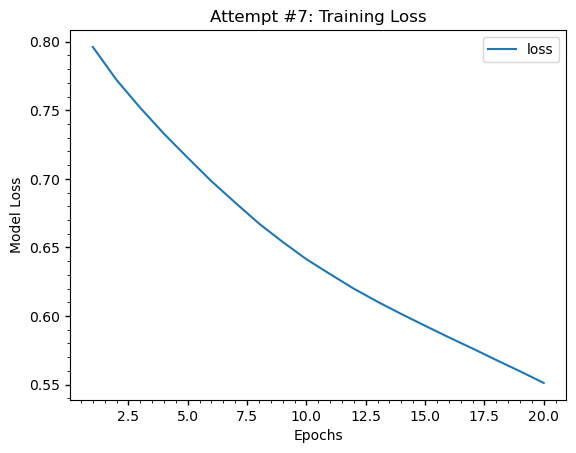

In [31]:
# Create a DataFrame containing training history
a7_df = pd.DataFrame(model_7.history)

# Increase the index by 1 to match the number of epochs
a7_df.index += 1

# Plot the loss
a7_df.plot(y="loss")
plt.title("Attempt #7: Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Model Loss")
plt.minorticks_on()
plt.tick_params(width=1)
plt.savefig("resources/images/a7_loss.png", format="png")
plt.show()

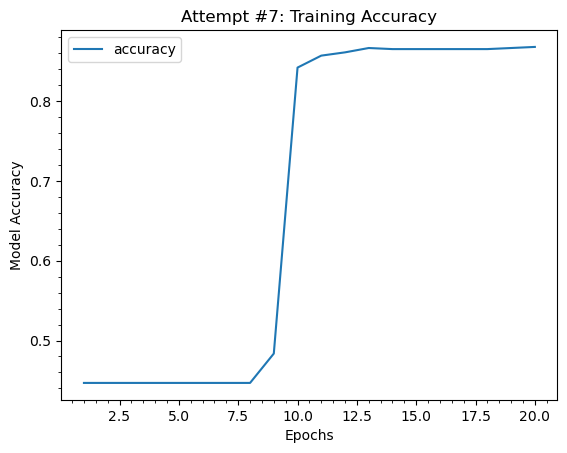

In [32]:
# Plot the accuracy
a7_df.plot(y="accuracy")
plt.title("Attempt #7: Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Model Accuracy")
plt.minorticks_on()
plt.savefig("resources/images/a7_accuracy.png", format="png")
plt.show()

## Attempt #8
### 86.41% accuracy, .3421 loss
### Changing the number of Neurons in each layer
* With attempt #8, we looked at the effect of increasing the number of neurons. All other variables we kept the same as attempt #4 to isolate the change in results.
* By increasing the number of neurons in a layer, the model can potentially capture more complex patterns in the data. This allows for better representation of the underlying relationships between the features and the target variable, potentially leading to higher accuracy.
* An increase in neurons appears to have an affect in reducing the error, given the reduced loss over many previous attempts; however, accuracy remains roughly that of the prior attempts.

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  20
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 10
hidden_nodes_layer4 = 10
hidden_nodes_layer5 = 10
hidden_nodes_layer6 = 10

nn_model_8 = tf.keras.models.Sequential()

# First hidden layer
nn_model_8.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn_model_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Fifth hidden layer
nn_model_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# Sixth hidden layer
nn_model_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_8.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_8.summary()

/Users/andrewmack/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 50)             │         1,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,321 (9.07 KB)

 Trainable params: 2,321 (9.07 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Compile the model
nn_model_8.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
# Train the model
model_8 = nn_model_8.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.5968 - loss: 0.6550
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.8176 - loss: 0.4872
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.8526 - loss: 0.3861
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.8746 - loss: 0.3386
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8513 - loss: 0.3653
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8679 - loss: 0.3402
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8399 - loss: 0.3779
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.8631 - loss: 0.3228
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8530 - loss: 0.3578
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8682 - loss: 0.3135
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8975 - loss: 0.2758
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_8.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 7ms/step - accuracy: 0.8641 - loss: 0.3421
Loss: 0.34210652112960815, Accuracy: 0.864130437374115


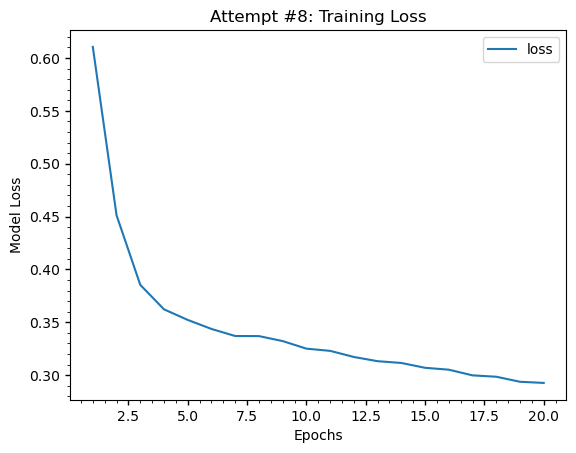

In [37]:
# Create a DataFrame containing training history
a8_df = pd.DataFrame(model_8.history)

# Increase the index by 1 to match the number of epochs
a8_df.index += 1

# Plot the loss
a8_df.plot(y="loss")
plt.title("Attempt #8: Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Model Loss")
plt.minorticks_on()
plt.tick_params(width=1)
plt.savefig("resources/images/a8_loss.png", format="png")
plt.show()

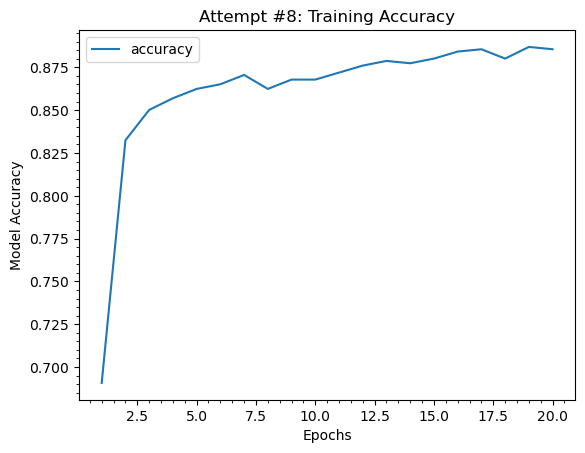

In [38]:
# Plot the accuracy
a8_df.plot(y="accuracy")
plt.title("Attempt #8: Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Model Accuracy")
plt.minorticks_on()
plt.savefig("resources/images/a8_accuracy.png", format="png")
plt.show()

## PHASE III

### Attempt #9.1:
* #### Replaced cholesterol values
* #### 88.04% accuracy, .4489 loss, 508 trials, 29 mins 36 secs

### Attempt #9.2:
* #### 88.59% accuracy, .3700 loss, 762 trials, 45 mins 24 secs

### Attempt #9.3:
* #### 88.04% accuracy, .8813 loss, 508 trials, 27 mins, 27 secs

### Attempt #9.4:
* #### 91.30% accuracy, .3591 loss, 508 trials, 29 mins 36 secs

In [39]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model_9 = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model_9.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=100,
        step=10), activation=activation, input_dim=20))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 10)):
        nn_model_9.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model_9.add(tf.keras.layers.Dense(units=1, activation="tanh"))

    # Compile the model
    nn_model_9.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model_9

In [40]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=200,
    hyperband_iterations=2)

/Users/andrewmack/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=200,validation_data=(X_test_scaled,y_test))

Trial 508 Complete [00h 00m 10s]
val_accuracy: 0.44565218687057495

Best val_accuracy So Far: 0.9130434989929199
Total elapsed time: 00h 29m 36s


In [42]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 91,
 'num_layers': 10,
 'units_0': 3,
 'units_1': 7,
 'units_2': 3,
 'units_3': 1,
 'units_4': 9,
 'units_5': 3,
 'units_6': 5,
 'units_7': 7,
 'units_8': 7,
 'units_9': 9,
 'tuner/epochs': 200,
 'tuner/initial_epoch': 67,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0484'}

In [43]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 16ms/step - accuracy: 0.9130 - loss: 0.3591
Loss: 0.3591398596763611, Accuracy: 0.9130434989929199


### Attempt #10.1:
* #### Used the cholesterol values in the original data set, rather than median or mean Cholesterol values as in prior model attempts.
* #### Of note is that accuracy in these attempts rises slightly above prior attempts, into the nineties:
* #### 92.93% accuracy, 4741 loss 508 trials, 52 mins, 32 secs

### Attempt #10.2:
* #### 90.70% accuracy, .3692 loss, 508 trials, 52m mins 32 secs

In [55]:
# Connect to the database
con = sqlite3.connect('resources/heart.sqlite') 

# Run SQL on table         
sql_query = pd.read_sql('SELECT * FROM original', con)

# Display query results
sql_query.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [56]:
# Convert SQL to Pandas DataFrame
df = pd.DataFrame(sql_query, columns = ['Age',
                                        'Sex',
                                        'ChestPainType',
                                        'RestingBP',
                                        'Cholesterol',
                                        'FastingBS',
                                        'RestingECG',
                                        'MaxHR',
                                        'ExerciseAngina',
                                        'Oldpeak',
                                        'ST_Slope',
                                        'HeartDisease']
                 )

# Preview newly created DF
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [57]:
# Split our preprocessed data into our target and features arrays
y2 = df['HeartDisease']

# Drop the non-beneficial ID columns, 'HeartDisease'.
X2 = df.drop(columns='HeartDisease')

In [58]:
# Convert categorical data to numeric with `pd.get_dummies`
X2= pd.get_dummies(X2)

# Preview the X2 DataFrame
X2.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [59]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X2, y2, stratify = y, test_size = .2)

In [60]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [61]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model_12 = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model_12.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=100,
        step=10), activation=activation, input_dim=20))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 10)):
        nn_model_12.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model_12.add(tf.keras.layers.Dense(units=1, activation="tanh"))

    # Compile the model
    nn_model_12.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model_12

In [62]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=200,
    hyperband_iterations=2)

/Users/andrewmack/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=200,validation_data=(X_test_scaled,y_test))

Trial 508 Complete [00h 00m 14s]
val_accuracy: 0.8913043737411499

Best val_accuracy So Far: 0.907608687877655
Total elapsed time: 00h 52m 32s


In [64]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 71,
 'num_layers': 3,
 'units_0': 9,
 'units_1': 7,
 'units_2': 1,
 'units_3': 3,
 'units_4': 9,
 'units_5': 9,
 'units_6': 3,
 'units_7': 5,
 'units_8': 5,
 'units_9': 7,
 'tuner/epochs': 200,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [65]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 11ms/step - accuracy: 0.9076 - loss: 0.3692
Loss: 0.3691979646682739, Accuracy: 0.907608687877655


In [2]:
# read model results into DataFrame
attempt_results = pd.read_csv("model_tracking/model_tracking.csv", sep=",")

attempt_results

,Index,Attempt,Accuracy,Loss,Type,Comment,Unnamed: 6
0,1,1.0,87.83%,35.09%,Hyperparameter Tuner,Simple hyperparameter tuner model w/ original ...,NaN
1,2,2.0,87.70%,37.34%,Hyperparameter Tuner,Simple hyperparameter tuner model w/ patients ...,NaN
2,3,3.0,88.26%,39.02%,Hyperparameter Tuner,Simple hyperparameter tuner model w/ cholester...,NaN
3,4,4.0,86.96%,51.90%,Sequential,"Base sequential model, modeled after attempt #...",NaN
4,5,5.0,88.04%,37.11%,Sequential,Base sequential model w/ # of layers reduced (...,NaN
5,6,6.0,84.78%,41.90%,Sequential,Base sequential model w/ # of epochs increased...,NaN
6,7,7.0,86.41%,55.04%,Sequential,Base sequential model w/ different activation...,NaN
7,8,8.0,86.41%,34.21%,Sequential,Base sequential model w/ increased number of n...,NaN
8,9,9.1,88.04%,44.89%,Hyperparameter Tuner,More robust hyperparameter model run on datase...,NaN
9,10,9.2,88.59%,37.00%,Hyperparameter Tuner,More robust hyperparameter model run on datase...,NaN


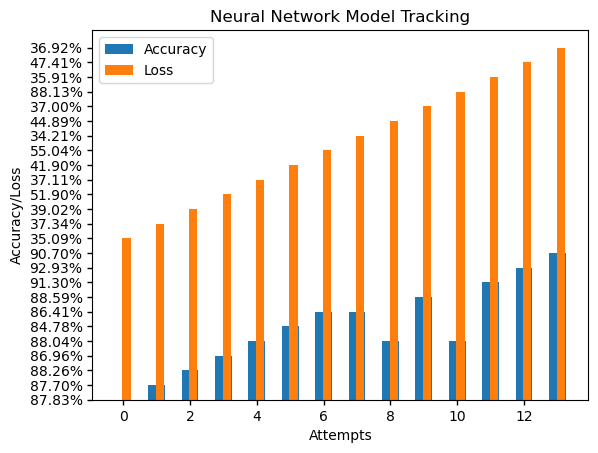

In [85]:
# plot model results
import numpy as np

# Set the bar width
width = 0.10

# # Set bar positions on the x-axis
b1 = np.arange(len(attempt_results['Index']))
b2 = [x + width for x in b1]

# create bar graph
plt.bar(b1, attempt_results['Accuracy'], label='Accuracy', width=0.50)
plt.bar(b2, attempt_results['Loss'], label='Loss', width=0.25)
plt.title("Neural Network Model Tracking")
plt.xlabel("Attempts")
plt.ylabel("Accuracy/Loss")
plt.minorticks_off()
plt.tick_params(width=1)
plt.legend()
plt.savefig("model_tracking/model_results_barchart.png", format="png")
plt.show()

In [7]:
plot = attempt_results[["Accuracy", "Loss"]].plot(kind="bar")

TypeError: no numeric data to plot